# Making predictions and decisions with medical trial data

We have data for 6 studies that have been done on the effect of *specific allergen immunotherapy* (SIT) on eczema and the following success rates have been observed. In each of the trials, the investigator rated whether each patient's condition improved or not.

This data set is from the [Cochrane Database of Systematic Reviews](http://www.cochranelibrary.com/) article cited below, available for free [here](http://onlinelibrary.wiley.com/doi/10.1002/14651858.CD008774.pub2/full). The Cochrane Database is a great resource for high quality data on all sorts of medical trials.

> Tam H., Calderon M.A., Manikam L., Nankervis H., García Núñez I., Williams H.C., Durham S., Boyle R.J. (2016). Specific allergen immunotherapy for the treatment of atopic eczema. *Cochrane Database of Systematic Reviews, Issue 2*. Art. No.: CD008774. DOI: 10.1002/14651858.CD008774.pub2.

| Study          | Improved | Not improved |
|:-------------- | --------:| ------------:|
| Di Rienzo 2014 | 20       | 3            |
| Galli 1994     | 10       | 6            |
| Kaufman 1974   | 13       | 3            |
| Qin 2014       | 35       | 10           |
| Sanchez 2012   | 22       | 9            |
| Silny 2006     | 7        | 3            |
| **Totals**     | **107**  | **34**       |

## Task 1: Modeling
**Build a statistical model for this data set.** As your data, use the total number of patients improved (107) and not improved (34).

**Steps in the modeling process:**
1. Motivate why the **binomial** distribution is an appropriate **likelihood function** for this type of data.
    1. Make sure the support of your likelihood function matches the type of data we are working with.
    2. Describe the unobserved parameter(s) of your model, and describe how it/they can be interpreted.
2. Use the conjugate **beta prior distribution**.
    1. Select appropriate values for the prior hyperparameters and motivate your choice.
    2. Visualize your prior distribution.
3. Compute and visualize the posterior distribution over the unobserved parameter(s) of your model. Also describe what the posterior tells you about the parameter(s).

Feel free to discuss this task with other students in the course, or attempt it on your own if you prefer. Discussing your modeling ideas with other students is a useful way to get feedback on your assumptions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as sts

#### 1. The binomial distribution is an appropriate likelihood function for this type of data because:
1. This is the distribution that integrates over the positive integers - consistent with our support of the possible number of successes for trials;
2. It works with the Boolean outcomes - either Success or Failure - assuming independence of experiments, consistent with the possible outcomes for our individual trials;
3. As parameters, it uses n as the total number of trials, k as the total number of successes and p as the probability of success for each trial - exactly the data we are provided with;
4. To conclude: ot is commonly used for integrating the data from individual Bernoulli trials - precisely what we are attempting to do.

#### 2.
For the prior distribution, we do not want to assume any particular probability distribution as to not skew the posterior and are not given any knowledge that would allow us to estimate its parameters. Thus, we would prefer to choose a uniform distribution, with the probability of success and failure being equal. However, we need not to use precisely the uniform distribution - it is enough to use the distribution that resembles it closely on our interval of interest: such is the case of the beta distribution with the parameters a = 1, b = 1 resembling the uniform distribution on the interval [0, 1]. Additionally, beta distribution is also conjugate to the binomial likelihood function, meaning if we use it we will be able to estimate the posterior distribution using the shortcut of the conjugate prior.

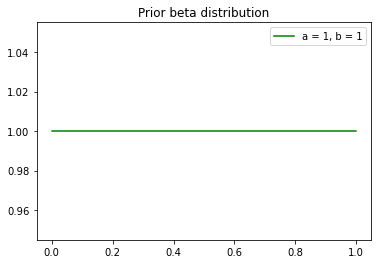

In [2]:
x = np.linspace(0, 1)

prior = sts.beta.pdf(x, a = 1, b = 1)

plt.plot(x, prior, color = 'green', label = 'a = 1, b = 1')
plt.title('Prior beta distribution')
plt.legend()
plt.show()

#### 3.
Now, knowing that the prior distribution is beta and conjugate to the binomial likelihood function, we are aware that our posterior is the beta distribution with the parameters a = initial_a + x, b = initial_b + N - x. Since initial_a = 1, initial_b = 1, x = 107 (improved patients, also represented by k), N = 107 + 34 = 141 (total number of patients, also denoted with n), then a = 1 + 107 = 108, b = 1 + 141 - 107 = 35.

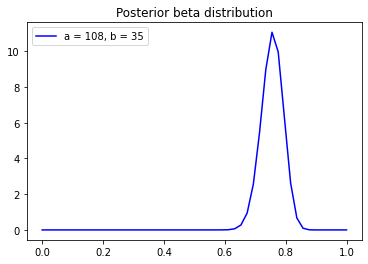

In [3]:
posterior = sts.beta.pdf(x, a = 108, b = 35)

plt.plot(x, posterior, color = 'blue', label = 'a = 108, b = 35')
plt.title('Posterior beta distribution')
plt.legend()
plt.show()

This distribution suggests that the probability of success that we have observed with our trials as samples is around 0.75.

## Task 2: Questions, predictions, and decisions
1. **Beta-binomial posterior predictive distribution:** Use your model to predict how many patients would improve if we treated 100 new eczema patients using SIT. Express your answer as a probability distribution over the number of patients improved.
2. Use your posterior to answer these questions:
    1. What is the probability that at least two thirds of eczema patients get better with SIT?
    2. What is the probability that at least 75% of eczema patients get better with SIT?
3. Use your model to decide whether the treatment works or not. Motivate your answer.

The beta-binomial distribution has the following parameters.

* $n \in \mathbb{N}_0$ – the number of trials
* $\alpha, \beta \in \mathbb{R}^+$ – corresponding to the parameters of the beta distribution

The probability mass function of the beta-binomial distribution is

$$p(k | n,\alpha,\beta) = \binom{n}{k}\frac{B(k+\alpha,n-k+\beta)}{B(\alpha,\beta)}$$

where $B$ is the beta function. See the code below for how to evaluate the beta-binomial pmf in Python.

In [4]:
# Beta-binomial pmf with k successful trials out of n total
# trials and alpha and beta parameters.
def beta_binomial_pmf(k, n, alpha, beta):
    from scipy.special import beta as beta_function, comb
    return comb(n, k) * beta_function(k + alpha, n - k + beta) / beta_function(alpha, beta)

#### 2.
In this case, we are predicting k - number of successful trials out of n = 100 total number of trials; a and b are as defined by our previous posterior distribution: a = 108, b = 35.

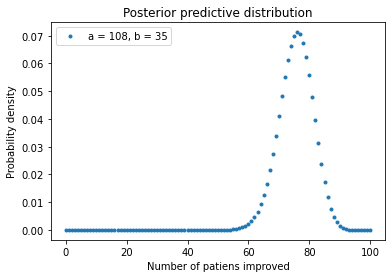

In [5]:
k = np.array(range(0, 101))
n = 100
a = 108
b = 35

predictivef = beta_binomial_pmf(k, n, a, b)

plt.plot(k, predictivef, '.', label = 'a = 108, b = 35')
plt.title('Posterior predictive distribution')
plt.ylabel('Probability density')
plt.xlabel('Number of patiens improved')
plt.legend()
plt.show()

In [6]:
twothirds = sts.beta.cdf(2/3, a = 108, b = 35)
print('The probability that at least two thirds of eczema patients get better with SIT is', 1 - twothirds)

seventyfivepercent = sts.beta.cdf(0.75, a = 108, b = 35)
print('The probability that at least 75% of eczema patients get better with SIT is', 1 - seventyfivepercent)

The probability that at least two thirds of eczema patients get better with SIT is 0.9902521886495699
The probability that at least 75% of eczema patients get better with SIT is 0.5706496661069852


In [7]:
half = sts.beta.cdf(1/2, a = 108, b = 35)
print('The probability that at least half of eczema patients get better with SIT is', 1 - half)

The probability that at least half of eczema patients get better with SIT is 0.9999999998216639


#### 3.
Whether we define the treatment as successful or not depends on how we define success. Given our distribution, we can conclude that it is almost certain that at least half of the patients will be improved with it; it is very likely that at least two thirds will be improved; and it is more likely than not that at least three fourths will be improved. Thus, it is by no means a perfect treatment that works 100% of the time, but it is one that is a worthwhile to try.